In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [49]:
def display(img, cmap="gray"):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

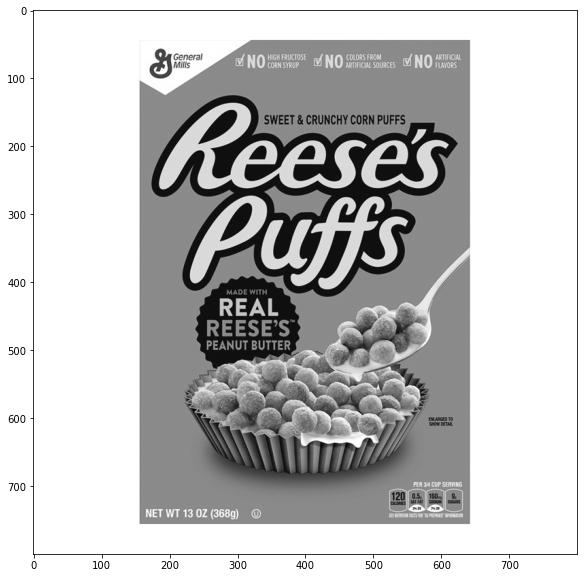

In [50]:
reeses = cv2.imread("reeses_puffs.jpg", 0)

display(img=reeses)


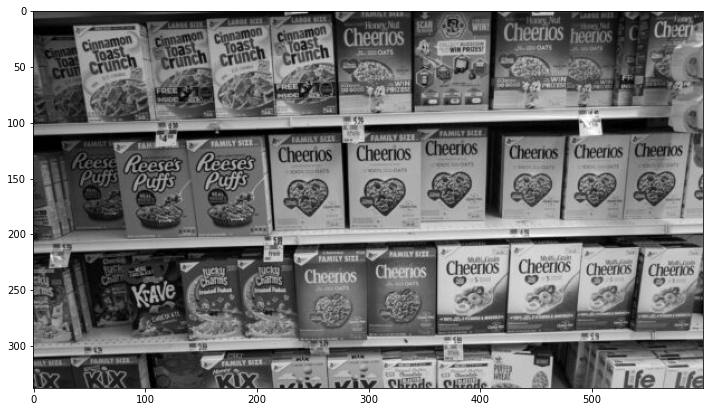

In [51]:
cereals = cv2.imread("reeses_isles.jpg" , 0)
display(cereals)

## ORB descriptors

In [52]:
orb = cv2.ORB_create()

In [53]:
kp1, des1 = orb.detectAndCompute(reeses, None)
kp2, des2 = orb.detectAndCompute(cereals, None)


In [54]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [55]:
matches  = bf.match(des1, des2)

In [56]:
matches[1].distance

69.0

In [57]:
matches = sorted(matches, key=lambda x: x.distance)

In [58]:
reeses_match = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:30], None, flags=2)

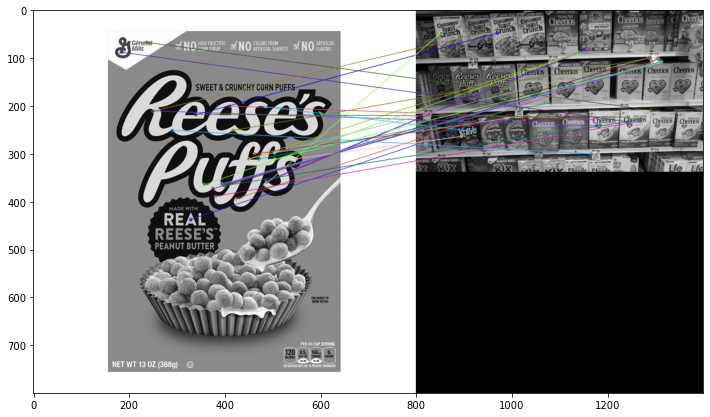

In [59]:
display(reeses_match)

## SIFT descriptors 

In [63]:
sift  = cv2.xfeatures2d.SIFT_create()


In [64]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)


In [18]:
bf = cv2.BFMatcher()

In [24]:
matches = bf.knnMatch(des1, des2, k=2)
matches[:2]

[[<DMatch 000001CC559DD890>, <DMatch 000001CC557A87B0>],
 [<DMatch 000001CC557A8A90>, <DMatch 000001CC557A8910>]]

In [40]:
good = []
# RATION MATCH1 < 75 % MATCH 2
# if match1 is less than 75 % of match 2 than lets keep that descriptor
for match1, match2 in matches:
    if match1.distance < 0.80*match2.distance:
        good.append([match1])

In [41]:
len(good)

11

In [42]:
len(matches)

500

In [72]:
sift_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

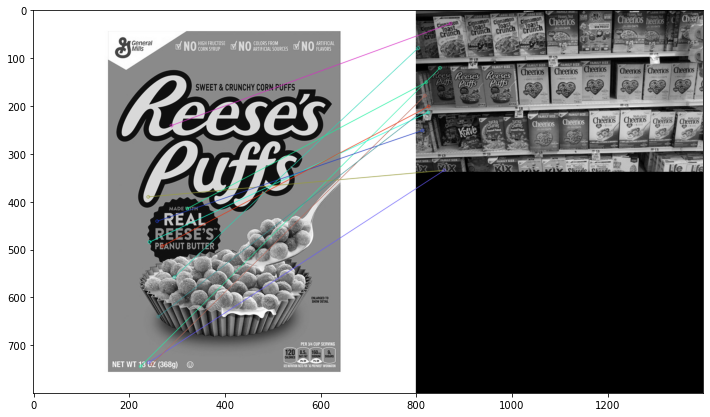

In [73]:
display(sift_matches)

### FLANN descriptors

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()

In [ ]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)


In [65]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params  = dict(algorithm=FLANN_INDEX_KDTREE)
search_params = dict(checks=50) 

In [76]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [77]:
matches = flann.knnMatch(des1, des2, k=2)


In [78]:
good = []
# RATION MATCH1 < 75 % MATCH 2
# if match1 is less than 75 % of match 2 than lets keep that descriptor
for match1, match2 in matches:
    if match1.distance < 0.80*match2.distance:
        good.append([match1])


In [80]:
flann_matches = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, good, None, flags=2)

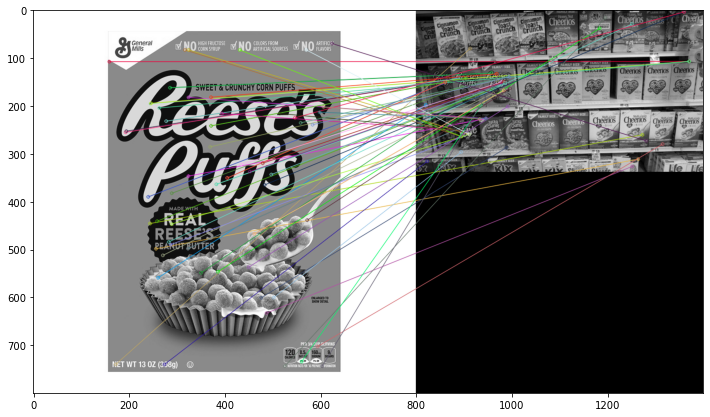

In [81]:
display(flann_matches)